# Logistic Regression Practice
**Possums**

<img src="./images/pos2.jpg" style="height: 250px">

*The common brushtail possum (Trichosurus vulpecula, from the Greek for "furry tailed" and the Latin for "little fox", previously in the genus Phalangista) is a nocturnal, semi-arboreal marsupial of the family Phalangeridae, native to Australia, and the second-largest of the possums.* -[Wikipedia](https://en.wikipedia.org/wiki/Common_brushtail_possum)

In [2]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


### Get the data

Read in the `possum.csv` data (located in the `data` folder).

In [3]:
pdf = pd.read_csv(r'data\possum.csv')

## Data Overview

In [4]:
display(pdf.head(15))
display(pdf.tail(15))

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0
5,1,Vic,f,1.0,93.1,54.8,90.5,35.5
6,1,Vic,m,2.0,95.3,58.2,89.5,36.0
7,1,Vic,f,6.0,94.8,57.6,91.0,37.0
8,1,Vic,f,9.0,93.4,56.3,91.5,37.0
9,1,Vic,f,6.0,91.8,58.0,89.5,37.5


,site,pop,sex,age,head_l,skull_w,total_l,tail_l
89,7,other,m,3.0,92.6,54.6,85.0,38.5
90,7,other,m,3.0,97.8,59.6,89.0,38.0
91,7,other,m,2.0,90.7,56.3,85.0,37.0
92,7,other,m,3.0,89.2,54.0,82.0,38.0
93,7,other,m,7.0,91.8,57.6,84.0,35.5
94,7,other,m,4.0,91.6,56.6,88.5,37.5
95,7,other,m,4.0,94.8,55.7,83.0,38.0
96,7,other,m,3.0,91.0,53.1,86.0,38.0
97,7,other,m,5.0,93.2,68.6,84.0,35.0
98,7,other,f,3.0,93.3,56.2,86.5,38.5


In [5]:
print(pdf.shape)
print(pdf.columns)


(104, 8)
Index(['site', 'pop', 'sex', 'age', 'head_l', 'skull_w', 'total_l', 'tail_l'], dtype='object')


In [6]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   site     104 non-null    int64  
 1   pop      104 non-null    object 
 2   sex      104 non-null    object 
 3   age      102 non-null    float64
 4   head_l   104 non-null    float64
 5   skull_w  104 non-null    float64
 6   total_l  104 non-null    float64
 7   tail_l   104 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ KB


In [7]:
display(pdf.groupby(['sex', 'pop']).size())

display(pdf.groupby(['site', 'pop']).size())

sex  pop  
f    Vic      24
     other    19
m    Vic      22
     other    39
dtype: int64

site  pop  
1     Vic      33
2     Vic      13
3     other     7
4     other     7
5     other    13
6     other    13
7     other    18
dtype: int64

In [8]:
pdf.describe()

,site,age,head_l,skull_w,total_l,tail_l
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000


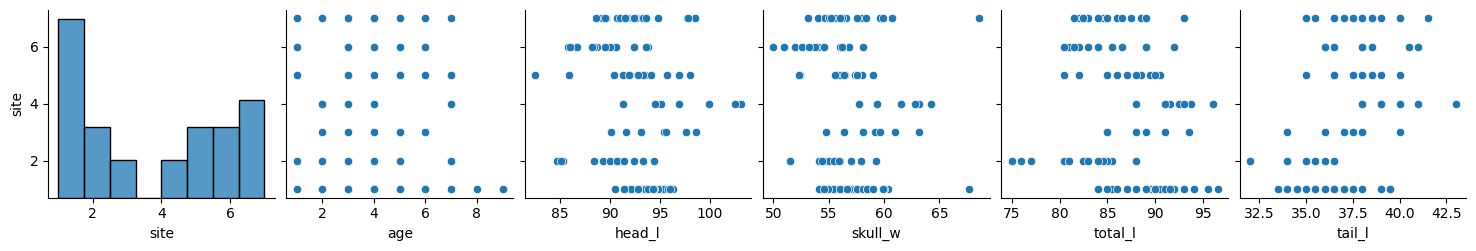

In [9]:
fig_a = sns.pairplot(pdf, y_vars='site')


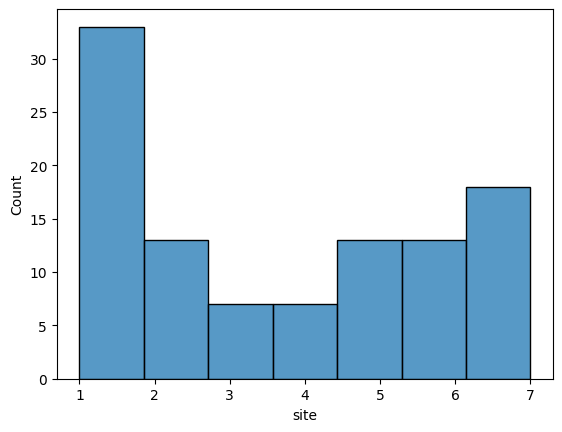

In [10]:
fig_b = sns.histplot(pdf, x='site', bins=7)


## Preprocessing

> Check for & deal with any missing values.  
Convert categorical columns to numeric.  
Do any other preprocessing you feel is necessary.

In [11]:
# There are two non-numeric columns to deal with: 'pop' and 'sex'. 
'''
At a high level, we know that 'pop' and 'site' are somewhat redundant: all rows from sites 1 & 2 are 'Vic' and all sites 3-7 are 'other'.  It's not really a fair test of ML capabilities to include such direct correlations in the training data, so let's do two tests: one on the ability to predict 'pop', and one on the ability to predict 'site' with only the head, skull, total, and tail metrics. (Age and sex will both be present, but I expect weak correlations to location)
'''

pdf['age'].fillna(value=pdf['age'].mean(), inplace=True)


In [12]:
pdf.columns

Index(['site', 'pop', 'sex', 'age', 'head_l', 'skull_w', 'total_l', 'tail_l'], dtype='object')

In [13]:
target_a_s = 'site'
target_b_p = 'pop'

XP = pdf.drop(columns=[target_a_s, target_b_p])

y_a_s = pdf[target_a_s]
y_b_p = pdf[target_b_p]

XP_atrain, XP_atest, y_a_s_train, y_a_s_test = train_test_split(XP, y_a_s, test_size=0.8, stratify=pdf[target_a_s], random_state=88)
XP_btrain, XP_btest, y_b_p_train, y_b_p_test = train_test_split(XP, y_b_p, test_size=0.8, stratify=pdf[target_b_p], random_state=88)

assert len(XP_atrain) + len(XP_atest) == len(XP), "split looks wonky!"
assert len(XP_btrain) + len(XP_btest) == len(XP), "split looks iffy!"


In [14]:
base_cat_a = pdf['site'].value_counts().index[0]
base_cat_b = pdf['pop'].value_counts().index[0]

baseline_a = (pdf['site'].value_counts(normalize=True)*100).round(2).iloc[0]
baseline_b = (pdf['pop'].value_counts(normalize=True)*100).round(2).iloc[0]

print("Site:", base_cat_a, " Pop:", base_cat_b)
print(baseline_a, '  ',  baseline_b)

Site: 1  Pop: other
31.73    55.77


## Modeling

> Build Logistic Regression model to predict `pop`; region of origin.  
Examine the performance of the model.

### Log Reg

In [15]:
XP_btrain

,sex,age,head_l,skull_w,total_l,tail_l
44,m,3.000000,90.7,55.9,81.0,34.0
72,m,1.000000,82.5,52.3,82.0,36.5
78,m,1.000000,85.8,50.0,81.0,36.5
9,f,6.000000,91.8,58.0,89.5,37.5
43,m,3.833333,85.1,51.5,76.0,35.5
66,m,4.000000,93.3,57.6,85.0,36.5
41,m,3.000000,85.3,54.1,77.0,32.0
23,m,2.000000,94.4,54.9,84.0,34.0
81,f,4.000000,86.0,54.0,82.0,36.5
2,f,6.000000,94.0,60.0,95.5,39.0


In [16]:
a_site_log_reg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(random_state=77),
)
a_site_log_reg.fit(XP_atrain, y_a_s_train)


b_pop_log_reg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(random_state=77),
)
b_pop_log_reg.fit(XP_btrain, y_b_p_train)

c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_c

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex'], use_cat_names=True)),
                ('logisticregression', LogisticRegression(random_state=77))])

In [17]:
print('Logistic Regression:')
print("---- To 'Site' -----")
print(f'Training Accuracy: {round(a_site_log_reg.score(XP_atrain, y_a_s_train),2)*100}')
print(f'Testing Accuracy: {round(a_site_log_reg.score(XP_atest, y_a_s_test),2)*100}')
print("---- To 'Pop' -----")
print(f'Training Accuracy: {round(b_pop_log_reg.score(XP_btrain, y_b_p_train),2)*100}')
print(f'Testing Accuracy: {round(b_pop_log_reg.score(XP_btest, y_b_p_test),2)*100}')

Logistic Regression:
---- To 'Site' -----
Training Accuracy: 90.0
Testing Accuracy: 36.0
---- To 'Pop' -----
Training Accuracy: 80.0
Testing Accuracy: 80.0


c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is

### Decision Tree Classifier

In [18]:
a_site_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=66)
)
a_site_dt.fit(XP_atrain, y_a_s_train)

b_pop_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=66)
)
b_pop_dt.fit(XP_btest, y_b_p_test)

c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_c

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex'], use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=66))])

In [19]:
print('Decision Tree Classifier:')
print("---- To 'Site' -----")
print(f'Training Accuracy: {round(a_site_dt.score(XP_atrain, y_a_s_train),2)*100}')
print(f'Testing Accuracy: {round(a_site_dt.score(XP_atest, y_a_s_test),2)*100}')
print("---- To 'Pop' -----")
print(f'Training Accuracy: {round(b_pop_dt.score(XP_btrain, y_b_p_train),2)*100}')
print(f'Testing Accuracy: {round(b_pop_dt.score(XP_btest, y_b_p_test),2)*100}')

Decision Tree Classifier:
---- To 'Site' -----
Training Accuracy: 100.0
Testing Accuracy: 30.0
---- To 'Pop' -----
Training Accuracy: 60.0
Testing Accuracy: 100.0


c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is

### Random Forest Classifier

In [20]:
a_site_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=55)
)
a_site_rf.fit(XP_atrain, y_a_s_train)

b_pop_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=55)
)
b_pop_rf.fit(XP_btrain, y_b_p_train)

c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_c

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex'], use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=55))])

In [21]:
print('Random Forest Classififcatoon:')
print("---- To 'Site' -----")
print(f'Training Accuracy: {round(a_site_rf.score(XP_atrain, y_a_s_train),2)*100}')
print(f'Testing Accuracy: {round(a_site_rf.score(XP_atest, y_a_s_test),2)*100}')
print("---- To 'Pop' -----")
print(f'Training Accuracy: {round(b_pop_rf.score(XP_btrain, y_b_p_train),2)*100}')
print(f'Testing Accuracy: {round(b_pop_rf.score(XP_btest, y_b_p_test),2)*100}')

Random Forest Classififcatoon:
---- To 'Site' -----
Training Accuracy: 100.0
Testing Accuracy: 46.0
---- To 'Pop' -----
Training Accuracy: 100.0
Testing Accuracy: 67.0


c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is

### XGBoost Classifier

In [26]:
a_site_xgb = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    XGBClassifier(objective='binary:logistic')
)
a_site_xgb.fit(XP_atrain, LabelEncoder().fit_transform(y_a_s_train))

b_pop_xgb = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    XGBClassifier(objective='binary:logistic')
)
b_pop_xgb.fit(XP_btrain, LabelEncoder().fit_transform(y_b_p_train))

c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_c

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex'], use_cat_names=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [23]:
print('XG Boost Classifier:')
print("---- To 'Site' -----")
print(f'Training Accuracy: {round(a_site_xgb.score(XP_atrain, y_a_s_train),2)*100}')
print(f'Testing Accuracy: {round(a_site_xgb.score(XP_atest, y_a_s_test),2)*100}')
print("---- To 'Pop' -----")
print(f'Training Accuracy: {round(b_pop_xgb.score(XP_btrain, y_b_p_train),2)*100}')
print(f'Testing Accuracy: {round(b_pop_xgb.score(XP_btest, y_b_p_test),2)*100}')

c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be re

XG Boost Classifier:
---- To 'Site' -----
Training Accuracy: 0.0
Testing Accuracy: 8.0
---- To 'Pop' -----


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Vic' 'other'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

## Interpretation & Predictions

> Interpret at least one coefficient from your model.  
> Generate predicted probabilities for your testing set.  
> Generate predictions for your testing set.

In [ ]:
b_pop_log_reg

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex'], use_cat_names=True)),
                ('logisticregression', LogisticRegression(random_state=77))])

When trying to calculate coefficient using 
>features = b_pop_log_reg.feature_names_in_

I got a length mismatch between coeff and features -- features was 1 item longer. 

Assuming that this is due to OneHotEncoder making an extra column for sex-M and sex-F values, I created a new feature list accounting for this to graph by

['sex_a', 'sex_b', 'age', 'head_l', 'skull_w', 'total_l', 'tail_l']
[[ 0.2791962  -0.3098126  -0.02333621  0.18424489 -0.33609813 -0.10970203
   0.70627926]]


<Axes: >

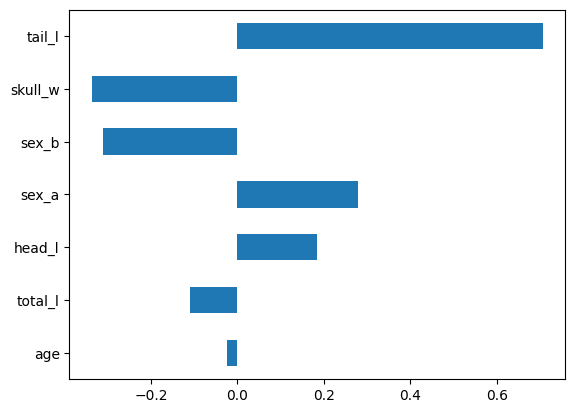

In [24]:
coeff = b_pop_log_reg.named_steps['logisticregression'].coef_
features = ['sex_a', 'sex_b', 'age', 'head_l', 'skull_w', 'total_l', 'tail_l']
print(features)
print(coeff)

feat_imp = pd.Series(coeff[0], index=features).sort_values(key=abs)
feat_imp.tail(20).plot(kind='barh')